In [26]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [57]:
df_longe = pd.read_csv('nossa_longe.csv')
df_med = pd.read_csv('nossa_med.csv')
df_perto = pd.read_csv('nossa_perto.csv')

# Leituras do Giuliano
df_1 = pd.read_csv('leitura_1.csv')
df_2 = pd.read_csv('leitura_2.csv')

In [58]:
exp_read_list = {}

for df in [df_perto, df_med, df_longe]:
#for df in [df_1, df_2]:
    for read, exp in zip(df['read'], df['expected']):
        if exp in exp_read_list.keys():
            exp_read_list[exp].append(read)
        else:
            exp_read_list[exp] = []
            exp_read_list[exp].append(read)
            

In [59]:
x = []
y = []
for exp in exp_read_list.keys():
    for read in exp_read_list[exp]:
        x.append(exp)
        y.append(read)
x = np.array(x)
y = np.array(y)

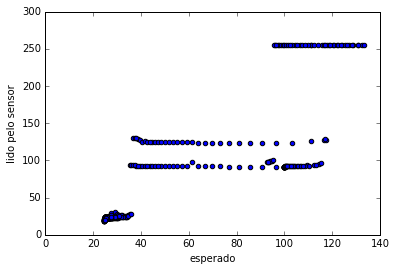

In [60]:
plt.scatter(x,y)
plt.ylabel('lido pelo sensor')
plt.xlabel('esperado')

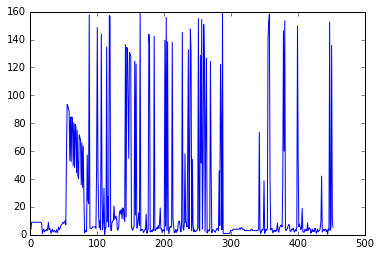

In [56]:
plt.plot(np.abs(x-y))